In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Загрузка нормализованного датасета
dataset_norm=pd.read_excel('General_norm.xlsx')
dataset_norm.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset_norm.head(10)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.452951,0.067654,0.427467,0.000000,0.149682,0.280303,0.725961,0.488979,0,0.276998,0.548135
1,0.282131,0.626533,0.452951,0.178021,0.506535,0.589311,0.149682,0.280303,0.725961,0.488979,0,0.276998,0.576985
2,0.282131,0.626533,0.452951,0.177469,1.000000,0.589311,0.149682,0.280303,0.725961,0.488979,0,0.276998,0.673149
3,0.282131,0.626533,0.452951,0.613972,0.373167,0.638420,0.149682,0.280303,0.725961,0.488979,0,0.346248,0.451971
4,0.457857,0.626533,0.461725,0.519387,0.427467,0.589311,0.149682,0.280303,0.725961,0.488979,0,0.346248,0.548135
5,0.457201,0.563509,0.458649,0.519387,0.427467,0.589311,0.149682,0.280303,0.725961,0.488979,0,0.346248,0.576985
6,0.419084,0.374437,0.494944,0.519387,0.427467,0.589311,0.149682,0.280303,0.725961,0.488979,0,0.346248,0.673149
7,0.417519,0.353429,0.327618,0.519387,0.427467,0.589311,0.271203,0.595486,0.228047,0.226365,0,0.484747,0.451971
8,0.608883,0.416453,0.545388,0.613972,0.373167,0.638420,0.271203,0.595486,0.228047,0.226365,0,0.484747,0.548135
9,0.604139,0.773589,0.872660,0.613972,0.373167,0.638420,0.721544,0.784596,0.311033,0.699069,0,0.484747,0.576985


In [4]:
# Разбиение выборки на обучающую и тестовую
x_train, x_test, y_train, y_test= train_test_split(dataset_norm.loc[:, dataset_norm.columns != 'Соотношение матрица-наполнитель'],
                                                    dataset_norm['Соотношение матрица-наполнитель'], 
                                                    test_size = 0.3, 
                                                    random_state = 14)

In [5]:
x_train

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
499,0.262900,0.842103,0.460593,0.215571,0.643760,0.429768,0.528349,0.818052,0.387291,0,0.604482,0.278602
83,0.599652,0.601485,0.452146,0.611761,0.613208,0.214203,0.518760,0.537730,0.415864,0,0.329921,0.677910
988,0.492054,0.502101,0.445766,0.232555,0.646965,0.096201,0.611868,0.352436,0.593626,1,0.554991,0.530347
500,0.531952,0.713516,0.559578,0.723296,0.779945,0.349991,0.599855,0.518684,0.510050,0,0.843376,0.440046
318,0.671588,0.342324,0.188068,0.529436,0.680064,0.513049,0.297974,0.339688,0.368547,0,0.438857,0.569577
...,...,...,...,...,...,...,...,...,...,...,...,...
327,0.668410,0.391876,0.506025,0.315834,0.702765,0.153594,0.246712,0.346676,0.500920,0,0.629901,0.530425
406,0.260972,0.440774,0.673412,0.371207,0.542712,0.392084,0.296759,0.309384,0.342176,0,0.541764,0.580556
268,0.258672,0.434922,0.456542,0.344353,0.607768,0.156526,0.856806,0.777081,0.565227,0,0.430132,0.672548
344,0.328953,0.177668,0.647845,0.348997,0.691937,0.329212,0.242857,0.455547,0.148918,0,0.593437,0.492748


In [6]:
y_train

499    0.463091
83     0.781902
988    0.692304
500    0.351801
318    0.570724
         ...   
327    0.352748
406    0.567533
268    0.396182
344    0.453454
619    0.276674
Name: Соотношение матрица-наполнитель, Length: 699, dtype: float64

In [7]:
x_test.shape

(300, 12)

In [10]:
y_test

172    0.446170
278    0.537060
486    0.672091
513    0.722540
672    0.518195
         ...   
85     0.410911
891    0.568919
850    0.254403
169    0.311714
198    0.655627
Name: Соотношение матрица-наполнитель, Length: 300, dtype: float64

In [11]:
# построение нейронной сети
model = Sequential() # тип нейронной сети
# количество слоёв и нейронов в каждом слое, функции активации
model.add(Dense(units=128, input_dim=12, activation='relu'))#указана размерность данных для первого слоя
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1))
#компиляция нейронной сети
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])
#обучение нейронной сети
trayning_NN=model.fit(x_train,y_train,batch_size=128, epochs=200, verbose=1)


Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 0.0841 - accuracy: 0.0000e+00
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.0014
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.0000e+00
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.0000e+00
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.0014
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.0000e+00
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.0014
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.0014
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.0000e+00
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.0000e+00
Epoch

Epoch 84/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.0014
Epoch 85/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.0014
Epoch 86/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 0.0014
Epoch 87/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.0014
Epoch 88/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.0014
Epoch 89/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.0014
Epoch 90/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.0014
Epoch 91/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.0014
Epoch 92/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.0014
Epoch 93/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.0014
Epoch 94/200
6/6 [==

6/6 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0014
Epoch 167/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0014
Epoch 168/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0014
Epoch 169/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0014
Epoch 170/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0014
Epoch 171/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0014
Epoch 172/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0014
Epoch 173/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0014
Epoch 174/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0014
Epoch 175/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.0014
Epoch 176/200
6/6 [=====

In [12]:
# статистика обучения для построения графика
trayning_NN.history

{'loss': [0.08407081663608551,
  0.043175291270017624,
  0.03761017695069313,
  0.03241002932190895,
  0.03357016667723656,
  0.03273988887667656,
  0.03160373866558075,
  0.03184361010789871,
  0.03155403956770897,
  0.031186481937766075,
  0.03100288286805153,
  0.030923016369342804,
  0.030827075242996216,
  0.030578764155507088,
  0.030391007661819458,
  0.030628422275185585,
  0.030241239815950394,
  0.030014555901288986,
  0.029979629442095757,
  0.029793869704008102,
  0.02967028133571148,
  0.02954346127808094,
  0.029317397624254227,
  0.02929593436419964,
  0.029221905395388603,
  0.029200920835137367,
  0.029013600200414658,
  0.028689147904515266,
  0.0288726557046175,
  0.02847333997488022,
  0.028146058320999146,
  0.028010079637169838,
  0.027998264878988266,
  0.028380168601870537,
  0.02875545062124729,
  0.029511693865060806,
  0.02825070358812809,
  0.027712667360901833,
  0.027149111032485962,
  0.026802686974406242,
  0.026545261964201927,
  0.026340467855334282,
 

In [13]:
#архитектура нейронной сети
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 29,057
Trainable params: 29,057
Non-traina

In [14]:
#тестирование нейронной сети
test_NN=model.evaluate(x_test, y_test, verbose=1)


10/10 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.0033


In [15]:
#тестирование нейронной сети с помощью предиктора
test_NN_prediction=model.predict(x_test)


10/10 [==============================] - 0s 1ms/step


(0.0, 1.0)

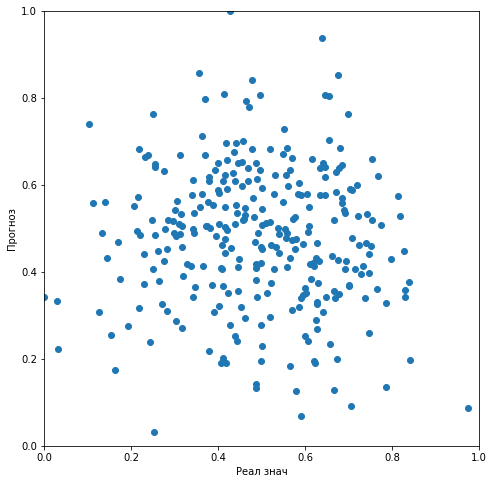

In [32]:
plt.figure(figsize = (8,8))
a = plt.axes(aspect = 'equal')
plt.scatter(y_test,test_NN_prediction)
plt.xlabel('Реал знач')
plt.ylabel('Прогноз')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)

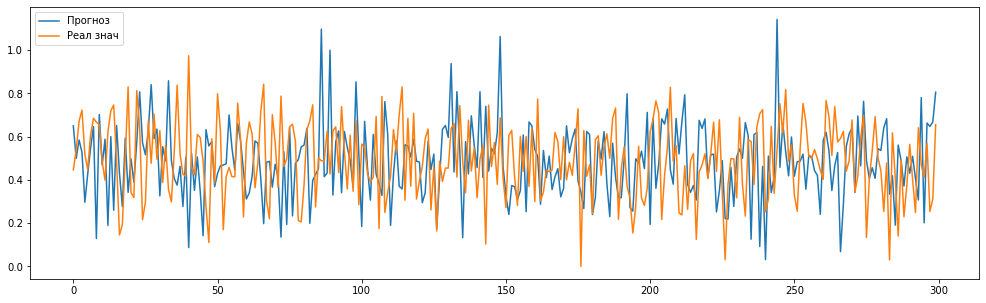

In [31]:
plt.figure(figsize = (17,5))
plt.plot(test_NN_prediction, label='Прогноз')
plt.plot(y_test.values, label='Реал знач')
plt.legend(loc='upper left')
plt.show()

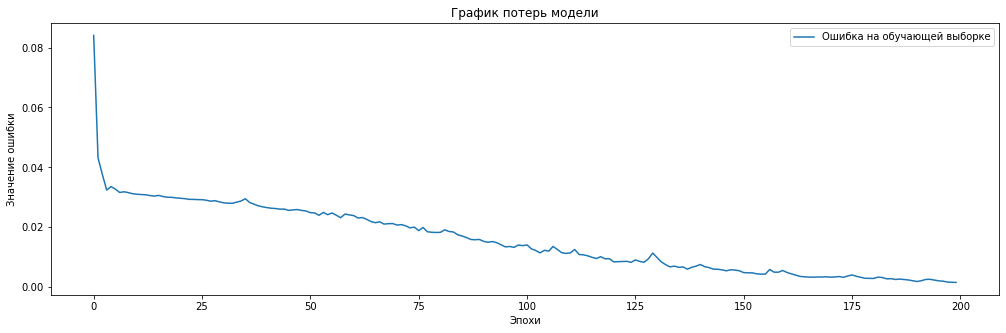

In [25]:
#График потерь на тренировочной и тестовой выборках
plt.figure(figsize = (17,5))
plt.plot(trayning_NN.history['loss'],label = 'ошибка на обучающей выборке')
plt.title('График потерь модели')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи')
plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
plt.show()